In [36]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [37]:
def mserror(y, y_pred):
    """
    среднеквадратичную ошибку прогноза
    """
    return np.mean((y - y_pred)**2)

def normal_equation(X, y):
    """
    вектор весов
    """
    return np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y)

def linear_prediction(X, w):
    """
    линейная комбинации столбцов
    """
    return np.dot(X, w)


def gradient_step(X, y, w, eta=0.01):
    
    n = len(y)
    # Вычисляем градиент по всем объектам обучающей выборки
    gradient = 2 * X.T.dot(X.dot(w) - y) / n
    # Преобразуем веса к типу float64 перед обновлением
    w = w.astype('float64')
    # Обновляем веса
    w -= eta * gradient
    return w

def gradient_descent(X, y, w_init, eta=1e-2, max_iter=1e4, min_weight_dist=1e-8, verbose=False):
    

    # Инициализируем расстояние между векторами весов на соседних итерациях
    weight_dist = np.inf
    # Инициализируем вектор весов модели начальными значениями
    w = w_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    
    # Основной цикл, выполняется до выполнения условий остановки или достижения максимального числа итераций
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # Создаем копию текущего вектора весов для отслеживания расстояния между итерациями
        tmp_weights = w
        # Выполняем шаг градиентного спуска и обновляем веса
        w = gradient_step(X, y, w, eta)
        # Вычисляем ошибку модели на текущей итерации и добавляем в список ошибок
        errors.append(mserror(linear_prediction(X, w), y))
        # Вычисляем евклидово расстояние между соседними векторами весов
        weight_dist = np.linalg.norm(tmp_weights - w, 2)
        # Увеличиваем значение счетчика итераций
        iter_num += 1
        
        # Если флаг verbose установлен, печатаем информацию о текущей итерации
        if verbose:
            print(f"Iteration {iter_num}: Error = {errors[-1]}")
    
    # По завершении цикла возвращаем обновленный вектор весов и список ошибок на каждой итерации
    return w, errors


In [38]:
df = pd.read_csv("insurance - insurance.csv")

In [39]:
# Преобразование строковых значений в числовые
label_encoder = LabelEncoder()
X_cat_encoded = df[['sex','smoker','region']].apply(label_encoder.fit_transform)
X_cat = X_cat_encoded.values

# Горячее кодирование
enc = OneHotEncoder()
X_cat = enc.fit_transform(X_cat).toarray()

# Соединение
X = np.concatenate([X_num,X_cat],axis=1)
df = df.assign(expenses=df['bmi'] )

y = df['expenses'].values

In [40]:
# Масштабирование (StandardScaler)


In [41]:
# Добавляем вектора весов w
X = np.hstack((np.ones((X.shape[0], 1)), X))


In [42]:

# Обучение модели/расчет весов
w_start = np.array([0] * X.shape[1])
grad_desc_weights, grad_errors_by_iter = gradient_descent(X, y,w_start, eta=0.01, max_iter=1e5)

In [43]:
y_pred = linear_prediction(X, grad_desc_weights)

In [44]:
# RMSE
rmse_val = mean_squared_error(y, y_pred,squared = False)
print(f'RMSE : {rmse_val}')

# MSE
mse_val = mean_squared_error(y, y_pred,squared = True)
print(f'MSE : {mse_val}')

RMSE : 5.656276043095251e-07
MSE : 3.1993458675693266e-13


In [45]:
grad_desc_weights

array([ 3.06633968e+01,  2.45653023e-07,  6.09590712e+00,  7.49419216e-09,
       -2.03967907e-08,  2.03967889e-08,  1.28036790e-08, -1.28036790e-08,
       -1.22874496e-07, -1.21182031e-07,  2.40859773e-07, -6.01917770e-09])

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'MSE')

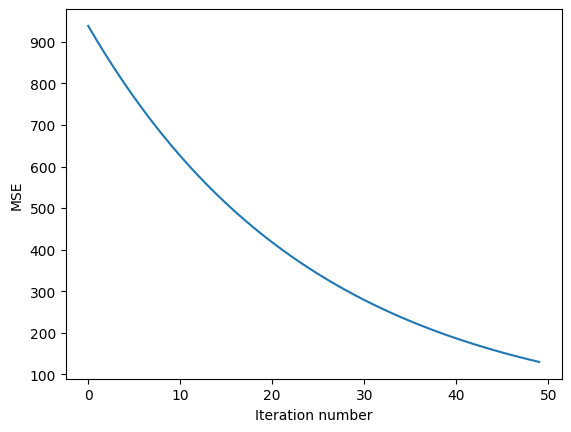

In [46]:
%pylab inline
plot(range(50), grad_errors_by_iter[:50])
xlabel('Iteration number')
ylabel('MSE')